<a href="https://colab.research.google.com/github/Haender-Michael/Haender_practice/blob/main/Copie_de_Copie_de_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Risk Assessment: Analysis for best Aicraft Acquisition.

##Introduction
For this analysis, we will use the dataset "Aviation Accident Database & Synopses, up to 2023" from Kaggle, provided by the National Transportation Safety Board (NTSB). This dataset contains comprehensive information about aviation accidents, including aircraft make and model, weather conditions,Injury severity,accident locations and more.

Our goal is to analyze accident patterns, aircraft reliability, and contributing risk factors in aviation incidents. We will generate data-driven insights to assist the new aviation division in identifying the safest aircrafts for purchase and determining the best strategies for fleet management.




##Dataset overview
- Aircraft Make and Model: Information about the specific make and model of the aircraft involved in each incident.

- Weather Conditions: Details on the weather conditions prevailing at the time of the accidents.
- Event date : the specific date each incident happened.
- location : The location where the aviation accident took place.
- injury severity: the Gravity and the amount of injuries.

the dataset also contains other information, that are less relevant to the analysis.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [88]:
df = pd.read_csv('./AviationData.csv', encoding='latin1', low_memory=False)


## Exploratory Data Analysis (EDA)
For the purpose of this analysis we will take the following steps:
- Data cleaning
- Data Understanding  
- Recommendations
- Summary



##Data cleaning.
In this part we will:
- drop columns.
- modify data type in entries and set Index.
- deal with missing values

these steps will ensure that everything run smoothly later during our Analysis.
Some other data clearing process will also be done later.

In [89]:
# First let's get a quick view of the data.
df.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
19218,20001213X32627,Accident,NYC88LA046,1987-11-24,"MENDHAM, NJ",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Cruise,Probable Cause,02-11-1989
24548,20001213X29844,Accident,MIA90LA032,1989-11-27,"COCOA, FL",United States,NaN,NaN,COI,MERRITT ISLAND,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,22-01-1991
19911,20001213X25220,Accident,BFO88LA030,1988-03-24,"NEW CUMBERLAND, WV",United States,NaN,NaN,7G1,HERRON,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,02-10-1989
2120,20020917X03371,Accident,FTW82DA295,1982-07-26,"FRANKLINTON, LA",United States,NaN,NaN,2R7,FRANKLINTON,...,Instructional,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,26-07-1983
28319,20001212X17395,Accident,SEA91LA146,1991-06-24,"WENATCHEE, WA",United States,NaN,NaN,NaN,NaN,...,Business,NaN,0.0,0.0,2.0,0.0,VMC,Maneuvering,Probable Cause,07-05-1993
29851,20001211X14130,Accident,LAX92LA114,1992-02-10,"SAN ARDO, CA",United States,NaN,NaN,NaN,PLOWED FIELD,...,Other Work Use,NaN,0.0,0.0,1.0,3.0,VMC,Standing,Probable Cause,13-08-1993
75936,20141020X70229,Accident,CEN15TA019,2014-10-18,"Oklahoma City, OK",United States,035250N,0972334W,KTIK,Tinker AFB,...,Public Aircraft - Federal,AIR USA INC,0.0,0.0,0.0,1.0,VMC,NaN,The loss of directional control during the tak...,25-09-2020
47787,20001212X20509,Accident,LAX00LA086,2000-02-02,"PALO ALTO, CA",United States,NaN,NaN,PAO,PALO ALTO,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Approach,Probable Cause,09-05-2001
85367,20200921X81023,Accident,CEN20CA405,2020-09-19,"Huntley, IL",United States,421317N,0882459W,6IL2,Phyllis Field,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The pilots decision to land at night without ...,20-08-2021
40313,20001208X06603,Accident,NYC96LA166,1996-08-10,"BEDFORD, MA",United States,NaN,NaN,BED,HANSCOM FIELD,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause,10-12-1996


In [90]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [91]:
# let's get some insight about how the data is structured.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [92]:
# Create a copy to preserve the original DataFrame.
df2 = df.copy()
df2
# from now on we will be working on this copy.

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [93]:
# removing unnecessary space in column names for easier access:
df.columns = df.columns.str.strip()


In [94]:
# replace "."by "_" in column names for better readability and accessibility.
df2.columns = df2.columns.str.replace('.','_')

### Drop columns :
Below we will drop columns that are not
needed for the analysis or that doesn't contain a substantial amount of entries.





In [95]:
# Event_Id will be be set as Index, so Accident_Number is unnecessary.
# Injury_Severity only summarizes the three injury level columns,it is not required.
# Publication_Date is not needed for this analysis.

df2 = df2.drop(columns =['Accident_Number','Publication_Date','Injury_Severity'])

In [96]:
# let's take a look on how much missing values each column contains:
missing_values_count = df2.isna().sum()
missing_values_count

,0
Event_Id,0
Investigation_Type,0
Event_Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport_Code,38757
Airport_Name,36185
Aircraft_damage,3194


In [97]:
# Keep only columns with acceptable missing values.
df2 = df2.loc[:, missing_values_count <= 50000]
df2

,Event_Id,Investigation_Type,Event_Date,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Registration_Number,Make,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,NaN,NaN,Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,N1867H,PIPER,...,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN
88885,20221227106494,Accident,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,Accident,2022-12-26,"Payson, AZ",United States,PAN,PAYSON,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN
88887,20221227106498,Accident,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,N210CU,CESSNA,...,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [98]:
df2.head()

,Event_Id,Investigation_Type,Event_Date,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Registration_Number,Make,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",United States,NaN,NaN,Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,1979-08-02,"Canton, OH",United States,NaN,NaN,Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


####Modify data type in entries and set index.
- set index
- reformat column type.


In [99]:
# Set index as Event_Id and make each row in the Event_Id unique.
df2 = df2.drop_duplicates(subset = ['Event_Id'])
df2.set_index('Event_Id',inplace=True)

In [100]:
# Reformating rows in Event_date to date format:
df2['Event_Date'] = pd.to_datetime(df2['Event_Date'])

<ipython-input-100-08498b8c75d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event_Date'] = pd.to_datetime(df2['Event_Date'])


In [101]:
# Let's convert the 5 columns :
# Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries, Total_Uninjured ,Number_of_Engines
# into intengers
df2[['Total_Fatal_Injuries','Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = (
    df2[['Total_Fatal_Injuries', 'Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']]
    .fillna(0)
    .astype(int)
)

<ipython-input-101-b38fa6eeee4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['Total_Fatal_Injuries','Number_of_Engines','Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']] = (


### Dealing with missing Values:
In this section we will be deleting columns that are missing tremendous amount of entries.
For the data to be representative there has to be a sustainable amount of values. Therefore, column with too much missing values will not serve the purpose of a good Analysis.
we will:
- Fill rows with missing values.

Dropping rows with missing values is not necessary for this Analysis.

In [102]:
# Since we have some columns with categorical data that have missing rows
# we can just replace the Null with "UNKNOWN".
categorical_data = []  # Initialize an empty list containing the column names with Categorical data.

for column in df2.columns:
    if df2[column].dtype == 'object':
        categorical_data.append(column)  # Store column names in the list

print(categorical_data)  # Display the categorical column names

# NB: Investigation has no null value that's why it is not part of the function above.

['Investigation_Type', 'Location', 'Country', 'Airport_Code', 'Airport_Name', 'Aircraft_damage', 'Registration_Number', 'Make', 'Model', 'Amateur_Built', 'Engine_Type', 'Purpose_of_flight', 'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status']


In [103]:
# Verify if the columns can truly be considered as Categorical:

df2[df2.columns.intersection(categorical_data)].sample(15)



,Investigation_Type,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Registration_Number,Make,Model,Amateur_Built,Engine_Type,Purpose_of_flight,Weather_Condition,Broad_phase_of_flight,Report_Status
Event_Id,,,,,,,,,,,,,,,
20001206X01607,Accident,"MONMOUTH BEACH, NJ",United States,NaN,NaN,Destroyed,N6375P,Piper,PA-24-250,No,Reciprocating,Positioning,VMC,Cruise,Probable Cause
20220224104698,Accident,"Tucson, AZ",United States,RYN,RYAN FLD,Substantial,N523WS,MCKENZIE JOHN P,EUROPA XS,No,Reciprocating,Personal,VMC,NaN,"The pilots improper landing flare, which resu..."
20001211X10915,Accident,"PENSACOLA, FL",United States,83J,COASTAL AIRPORT,Substantial,N7631,Schweizer,SGS 1-34,No,Unknown,Personal,VMC,Takeoff,Probable Cause
20001206X02369,Accident,"KOTZEBUE, AK",United States,OTZ,KOTZEBUE,Substantial,N20752,Cessna,A185F,No,Reciprocating,Unknown,VMC,Taxi,Probable Cause
20001213X29995,Accident,"FORT LAUDERDALE, FL",United States,NaN,NaN,Destroyed,N6879N,Mooney,M20,No,Reciprocating,Personal,VMC,Cruise,Probable Cause
20001212X17408,Accident,"PROSPECT CREEK, AK",United States,NaN,NaN,Substantial,N3158A,Cessna,170B,No,Reciprocating,Personal,IMC,Cruise,Probable Cause
20140707X41002,Accident,"Gasport, NY",United States,9G5,Royalton Airport,Substantial,N508CT,FLIGHT DESIGN GMBH,CT-SW 2006,No,Reciprocating,Personal,VMC,NaN,The pilot's failure to maintain adequate airsp...
20020917X04936,Accident,"PENSACOLA, FL",United States,PNS,PENSACOLA REGIONAL,Substantial,N2699V,Cessna,177RG,No,Reciprocating,Personal,VMC,Takeoff,Probable Cause
20001211X12805,Accident,"INDEPENDENT HIL, VA",United States,NaN,NaN,Substantial,N3186,Hancock- Harris,PITTS SPECIAL,Yes,Reciprocating,Personal,VMC,Cruise,Probable Cause


In [104]:
# now let's replace all of the Null value with UNKNOWN
df2[list(categorical_data)] = df2[list(categorical_data)].applymap(
    lambda x: 'UNKNOWN' if pd.isna(x) else x
)
df2.sample(5)


<ipython-input-104-cd299b52b257>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2[list(categorical_data)] = df2[list(categorical_data)].applymap(
<ipython-input-104-cd299b52b257>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[list(categorical_data)] = df2[list(categorical_data)].applymap(


,Investigation_Type,Event_Date,Location,Country,Airport_Code,Airport_Name,Aircraft_damage,Registration_Number,Make,Model,...,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status
Event_Id,,,,,,,,,,,,,,,,,,,,,
20111013X11758,Accident,2011-09-12,"Montauk, AO",United States,UNKNOWN,UNKNOWN,UNKNOWN,OE-LPB,BOEING,777,...,0,UNKNOWN,UNKNOWN,0,0,2,272,UNKNOWN,UNKNOWN,UNKNOWN
20150906X32704,Accident,2015-09-05,"Laconia, NH",United States,LCI,Laconia Municipal Airport,Substantial,N2264X,EVOLUTION AIRCRAFT INC,REVO,...,1,Reciprocating,Personal,1,0,0,0,VMC,UNKNOWN,The sport pilots improper decision to operate...
20160928X92308,Accident,2016-09-27,"Andover, NH",United States,UNKNOWN,UNKNOWN,Destroyed,N330JT,TATKOVSKY JAMES G,SAFARI,...,1,Reciprocating,Personal,0,0,1,0,VMC,UNKNOWN,The noncertificated pilots failure to maintai...
20001212X23695,Accident,1990-07-02,"MISSION, TX",United States,UNKNOWN,UNKNOWN,Substantial,N3653W,Air Tractor,AT-301,...,1,Reciprocating,Aerial Application,0,0,0,1,VMC,Maneuvering,Probable Cause
20220316104785,Accident,2022-03-11,"Taylorville, IL",United States,TAZ,Taylorville Municipal,Substantial,N755ZR,SOCATA,TBM 700,...,1,Turbo Prop,Personal,0,0,0,4,VMC,UNKNOWN,The pilots failure to maintain directional co...


## Data Understanding:
Below are key questions that the new aviation division may seek to answer. They will be addressed in the notebook.
- Which aircraft makes have suffered the fewest and the most accidents?
- How has accident frequency evolved over the years for certain countries?
- For which flight purpose have accidents been most frequent?
- How resistant are certain aircraft Make to accidents?
- How well are passengers protected in the event of an aircraft crash?
- Which airport has recorded the most accidents

N.B: All of the above questions cannot be answered with this DataFrame but each will be addressed.
An explanation to why some can't be answered with the current DataFrame will be provided.
If necessary an Analysis will also be provided just after the plot.

### Which aircraft makes have suffered the fewest and the most accidents?
To address(not answer) this question a bar chart of the top 5 Aircraft Makes that have suffered the most accidents and the 5 that have suffered the least will be provided.


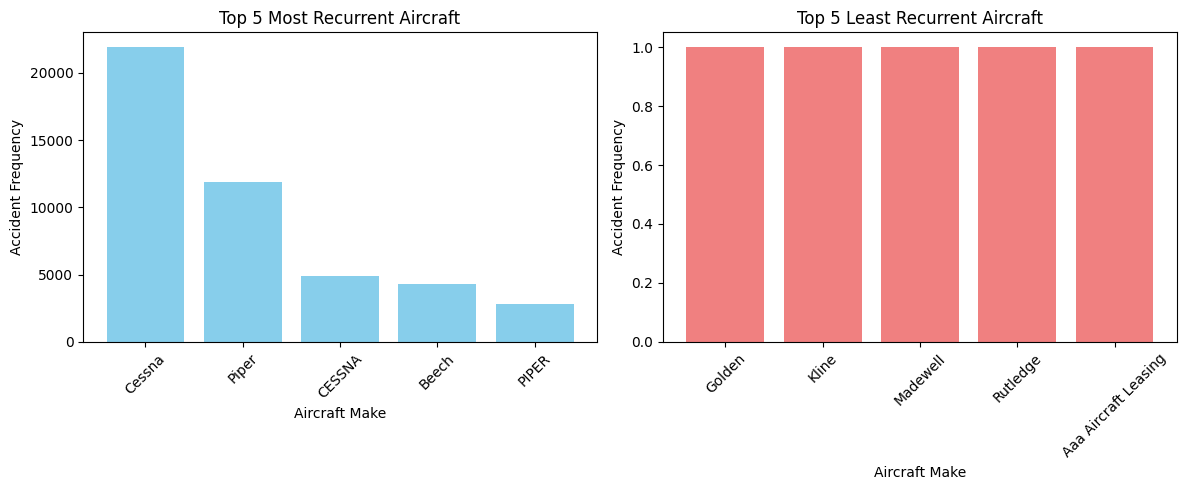

In [105]:
# we will graph in one figure the top 5 most recurrent Aircraft and the least 5  recurrent

# Retrieve top and least recurrent aircraft makes
most_recurrent = df2['Make'].value_counts().head(5)
least_recurrent = df2['Make'].value_counts().tail(5)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the most recurrent aircraft
axes[0].bar(most_recurrent.index, most_recurrent.values, color='skyblue')
axes[0].set_title('Top 5 Most Recurrent Aircraft')
axes[0].set_xlabel('Aircraft Make')
axes[0].set_ylabel('Accident Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Plot the least recurrent aircraft
axes[1].bar(least_recurrent.index, least_recurrent.values, color='lightcoral')
axes[1].set_title('Top 5 Least Recurrent Aircraft')
axes[1].set_xlabel('Aircraft Make')
axes[1].set_ylabel('Accident Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()




### Analysis :
Now, we might mistakenly believe that the least recurrent aircraft are the safest, but that’s not necessarily true. The fact these aircraft have fewer recorded accidents could simply mean that they have operated fewer flights, reducing their chances of incidents rather than proving their reliability.

To accurately answer this question, we need the total number of flights for each aircraft 'Make' and calculate accident rates by percentage. Only by comparing accident percentages can we determine which aircraft "Makes", could be considered as most reliable.

For example, if Aircraft Make Cessna has the most accidents, it might simply indicate that it has operated the most flights. However, when looking at accident percentages, it could actually be among the most reliable aircraft in terms of avoiding accidents.


### How has accident frequency evolved over the years for certain countries?
The new aviation division would want this information to assess:
- Evaluate safety trends → Assess whether accident rates have decreased due to improved regulations and technology.

- Identify high-risk regions → Determine which countries have consistently high accident frequencies and investigate possible causes.

- Improve fleet management → Make informed decisions about aircraft acquisition based on reliability across regions.

- Support policy decisions → Use data-driven insights to enhance aviation safety measures and operational guidelines.

N.B: Not all analyses can be completed within this single notebook. Some questions will be raised, and insights will be provided, but for further analysis, a position or contract may need to be established with the  data analyst who conducted the project. Contact information will be provided at the end.

In [106]:
# let's add a column 'Event_Year' to the DataFrame:
df2['Event_Year'] = df2['Event_Date'].apply(lambda x: str(x)[:4])


<ipython-input-106-c82a6687abc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Event_Year'] = df2['Event_Date'].apply(lambda x: str(x)[:4])


<ipython-input-113-ff6190f41f4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Event_Year"] = df2["Event_Year"].astype(int)


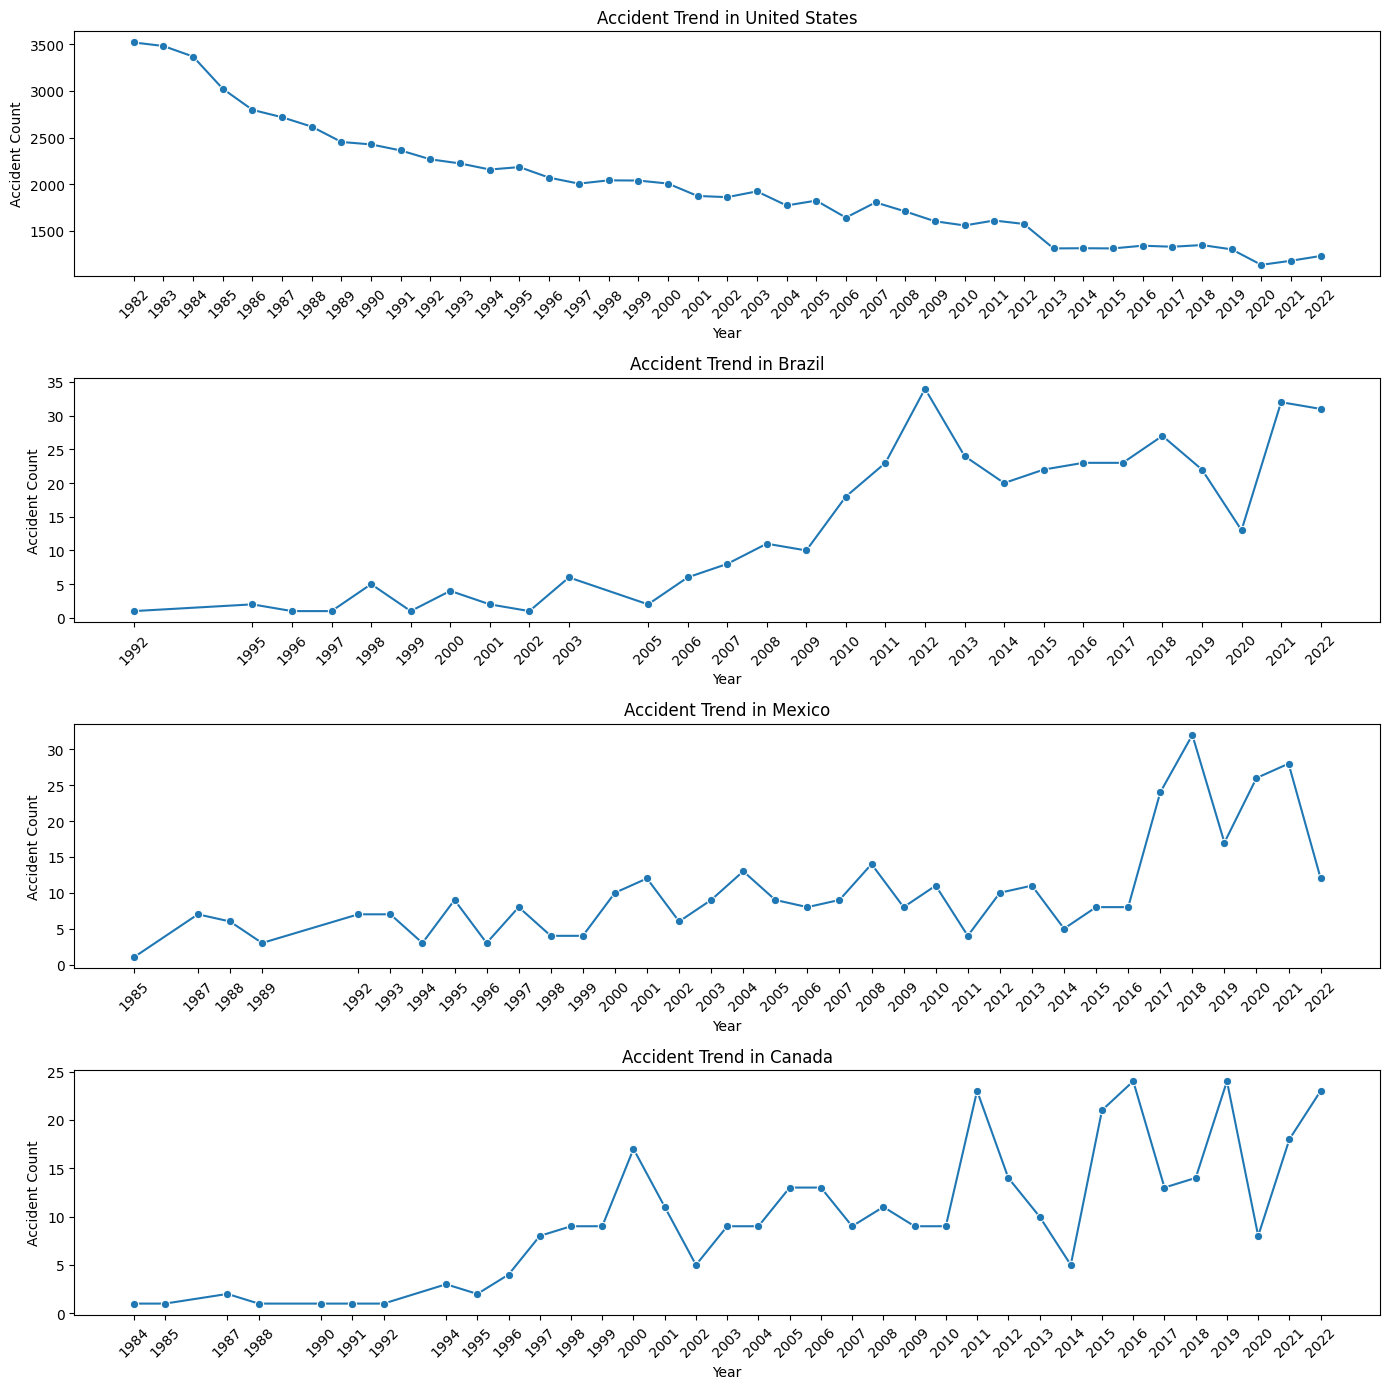

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert "Event_Year" to integer format
df2["Event_Year"] = df2["Event_Year"].astype(int)

# Get the top 4 countries  with the most accidents (excluding "UNKNOWN")
most_affected_countries = df2["Country"].value_counts().head(5).index.tolist()
most_affected_countries = [country for country in most_affected_countries if country != "UNKNOWN"]

# Filter dataset to start from 1982 for all countries
filtered_data = df2[df2["Event_Year"] >= 1982]

# Aggregate accident frequencies per year for each country
accident_trends = filtered_data.groupby(["Event_Year", "Country"]).size().reset_index(name="Accident_Count")


fig, axes = plt.subplots(4, 1, figsize=(14, 14))

# Loop through the first 4 most affected countries and plot accident trends
for i, country in enumerate(most_affected_countries[:4]):
    country_accidents = accident_trends[accident_trends["Country"] == country]

    sns.lineplot(data=country_accidents, x="Event_Year", y="Accident_Count", ax=axes[i], marker='o')
    axes[i].set_title(f"Accident Trend in {country}")
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Accident Count")

    # Ensure consistent x-axis formatting across all graphs
    axes[i].set_xticks(sorted(country_accidents["Event_Year"].unique()))
    axes[i].tick_params(axis='x', rotation=45)

# Improve spacing for clear visualization
plt.tight_layout()
plt.show()









### Analysis:
The information produced by the graphs is not up to date, as they only show accident trends from 1982 to 2022. Further analysis should be conducted using other datasets for better insights.

###For which flight purpose have accidents been most frequent?

In [115]:
# take a look on the different purpose of flight
df2['Purpose_of_flight'].value_counts()

,count
Purpose_of_flight,
Personal,49076
Instructional,10442
Unknown,6609
UNKNOWN,6122
Aerial Application,4686
Business,3971
Positioning,1632
Other Work Use,1250
Ferry,806


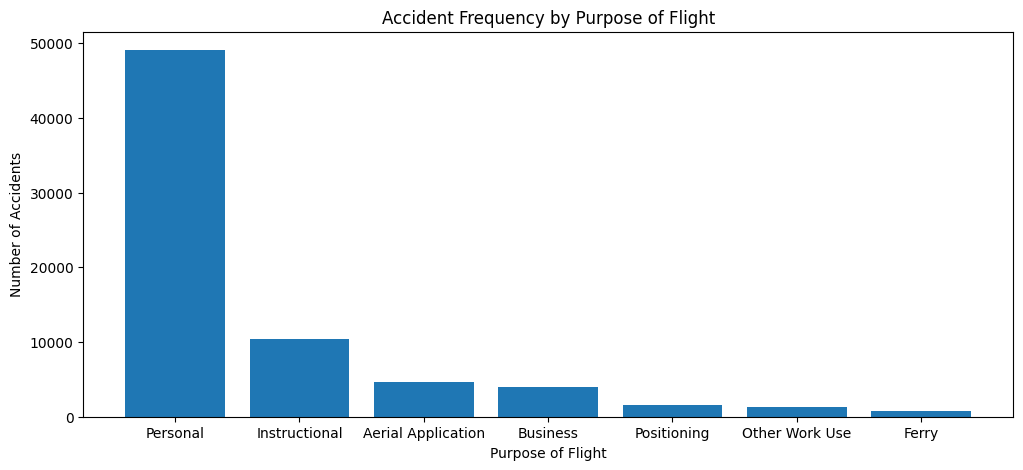

In [114]:
# Remove both "Unknown" and "UNKNOWN" entries from the dataset
purpose_of_flight = df2[~df2["Purpose_of_flight"].isin(["Unknown", "UNKNOWN"])]["Purpose_of_flight"].value_counts().head(7)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))  # Fixed typo

# Plot bar chart
ax.bar(purpose_of_flight.index, purpose_of_flight.values)
ax.set_title("Accident Frequency by Purpose of Flight")
ax.set_xlabel("Purpose of Flight")
ax.set_ylabel("Number of Accidents")

# Show the plot
plt.show()



### How resistant are certain aircraft Make to accidents?

In [124]:
# take a look at the Aircraft_damage unique entries first.
df2['Aircraft_damage'].value_counts(5)

,proportion
Aircraft_damage,
Substantial,0.723596
Destroyed,0.209230
UNKNOWN,0.036634
Minor,0.030540


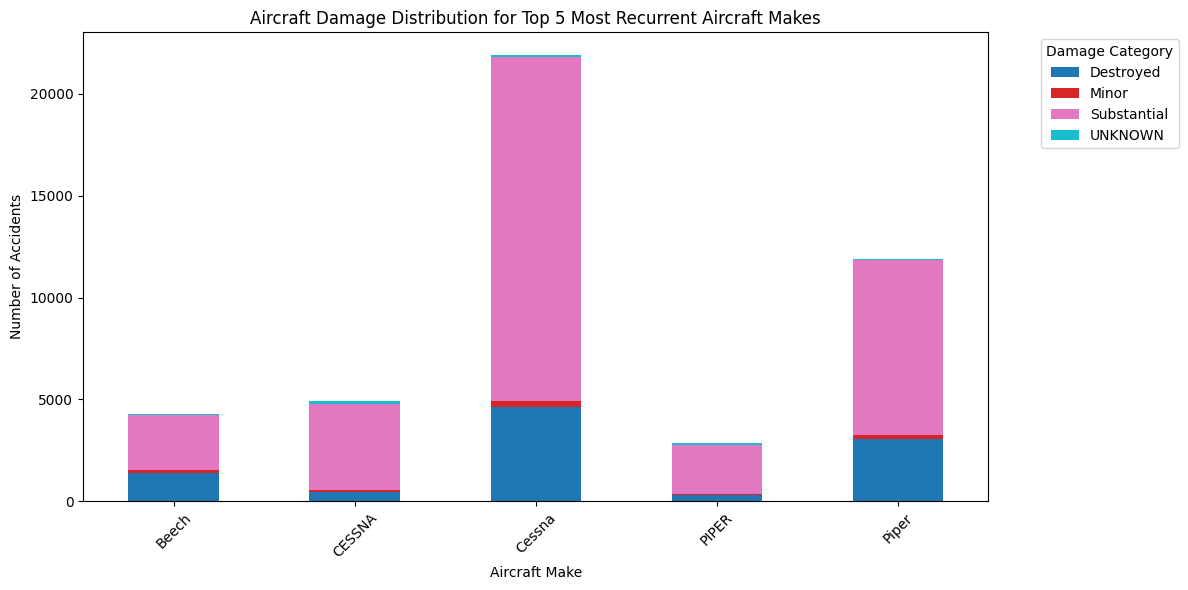

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the 5 most recurrent Aircraft Makes
top_5_makes = df2['Make'].value_counts().head(5).index

# Filter dataset to include only the top 5 aircraft makes
filtered_df = df2[df2['Make'].isin(top_5_makes)]

# Aggregate aircraft damage counts per make
damage_counts = filtered_df.groupby('Make')['Aircraft_damage'].value_counts().unstack().fillna(0)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
damage_counts.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

# Set labels and title
ax.set_title("Aircraft Damage Distribution for Top 5 Most Recurrent Aircraft Makes")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Number of Accidents")
ax.legend(title="Damage Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [125]:
# Simple cleaning
df2['Aircraft_damage'] = df2['Aircraft_damage'].replace('Unknown', 'UNKNOWN')


<ipython-input-125-c08d5e2697e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Aircraft_damage'] = df2['Aircraft_damage'].replace('Unknown', 'UNKNOWN')


In [ ]:
df2['Aircraft_damage'].value_counts(5)


###How well are passengers protected in the event of an aircraft crash?

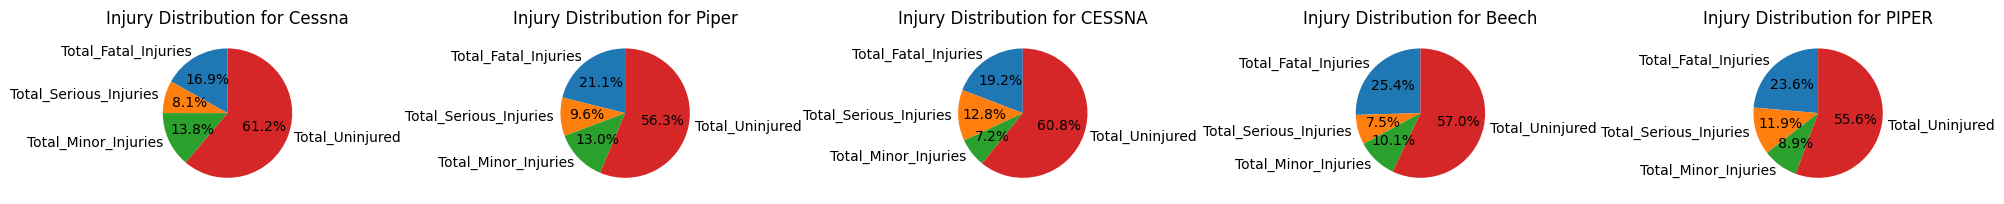

In [128]:
# this will be better answer with Interractive dashbord that will be submitted along with this notebook.
# for this analysis we will give an answe for the 5 most recurrent Aircraft Make
# 5 pie chart will be provided.


# Get the 5 most recurrent Aircraft Makes
top_5_makes = df2['Make'].value_counts().head(5)

# Create figure and axes for 5 pie charts
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Loop through each Aircraft Make and generate a pie chart
for i, make in enumerate(top_5_makes.index):
    # Filter data for the specific Aircraft Make
    make_data = df2[df2['Make'] == make][['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured']]

    # Sum injury types
    injury_counts = make_data.sum()

    # Generate pie chart
    axes[i].pie(injury_counts, labels=injury_counts.index, autopct="%1.1f%%", startangle=90)
    axes[i].set_title(f"Injury Distribution for {make}")

# Improve layout for clarity
plt.tight_layout()
plt.show()



###Which airport has recorded the most accidents

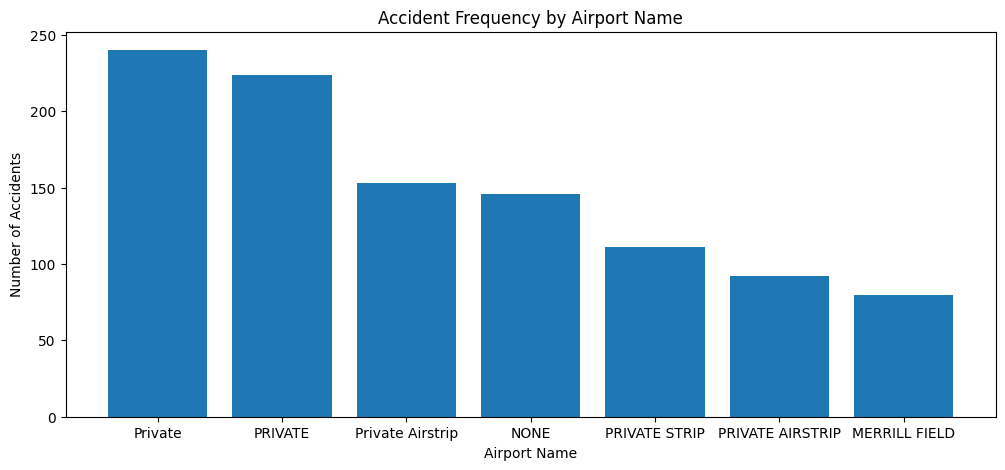

In [29]:
# Remove "UNKNOWN" entries from the dataset
airport_name = df2[df2["Airport_Name"] != "UNKNOWN"]["Airport_Name"].value_counts().head(7)

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Plot bar chart
ax.bar(airport_name.index, airport_name.values)
ax.set_title("Accident Frequency by Airport Name")
ax.set_xlabel("Airport Name")
ax.set_ylabel("Number of Accidents")

# Show the plot
plt.show()



##Conclusion
For this analysis, we will use the dataset "Aviation Accident Database & Synopses, up to 2023" from Kaggle, provided by the National Transportation Safety Board (NTSB). This dataset contains comprehensive information about aviation accidents, including aircraft make and model, weather conditions,Injury severity,accident locations and more.

Our goal is to analyze accident patterns, aircraft reliability, and contributing risk factors in aviation incidents. We will generate data-driven insights to assist the new aviation division in identifying the safest aircrafts for purchase and determining the best strategies for fleet management.

